In [1]:
import tensorflow as tf
import numpy as np
import matrix_decompositions_tf as fctr
import transforms as transf
import post_process_grad as ppg

fltrSz = (3,3)
fftSz = (8,8)
noc = 3
nof = 8
rho = 1.0
n_components = 3
nots = 100
dtype = tf.complex128

AInv = fctr.dictionary_object2D(fltrSz=fltrSz,fftSz=fftSz,noc = noc,nof = nof,rho = rho,objname='dictObj1',n_components=n_components,cmplxdtype=dtype)
#AInv2 = fctr.dictionary_object2D_full(fltrSz=fltrSz,fftSz = fftSz,noc = noc,nof = nof, rho = rho,name='dictObj2',lraParam = lraParam,dtype=dtype)

w = tf.complex(tf.random.normal((nots,) + fftSz + (noc,1),dtype=dtype.real_dtype),tf.random.normal((nots,) + fftSz + (noc,1),dtype = dtype.real_dtype))
w = w + tf.math.conj(tf.reverse(w,axis=(2,3)))
w = w[slice(None),slice(None),slice(0,5,1),slice(None),slice(None)]

B = transf.fft2d_inner(fftSz)(tf.random.normal((1,) + fltrSz + (noc,nof,),dtype=dtype.real_dtype))

x = tf.linalg.matmul(B,w,adjoint_a=True)
xi = tf.keras.layers.Input(x.shape[1:],dtype=dtype)
y = rho*xi + tf.linalg.matmul(B,tf.linalg.matmul(B,xi),adjoint_a=True)
z = AInv.qinv(y)
#z2 = AInv2.qinv(y)

my_model = ppg.Model_PostProcess(xi,z)
#my_model2 = ppg.Model_PostProcess(xi,z2)

my_model.compile(optimizer=tf.keras.optimizers.SGD(0.00001),loss=tf.keras.losses.MSE,run_eagerly=False)
#my_model2.compile(optimizer=tf.keras.optimizers.SGD(0.00001),loss=tf.keras.losses.MSE,run_eagerly=False)

my_model.fit(x=x,y=x,batch_size=10,epochs=2)
#my_model2.fit(x=x,y=x,batch_size=10,epochs=16)
my_model.save_weights('saved_dictionary_object2d-weights')

Epoch 1/2
10/10 [==============================] - 0s 5ms/step - loss: 372881.0938
Epoch 2/2
10/10 [==============================] - 0s 4ms/step - loss: 355410.4375


In [2]:
my_model.load_weights('saved_dictionary_object2d-weights')

In [1]:

import tensorflow as tf
import numpy as np
import matrix_decompositions_tf as fctr
import transforms as transf
import post_process_grad as ppg


fltrSz = (3,3)
fftSz = (8,8)
noc = 5
nof = 4
rho = 1.0
lraParam = {'n_components': 5}
nots = 100
dtype = tf.complex128

AInv = fctr.dictionary_object2D(fltrSz=fltrSz,fftSz=fftSz,noc = noc,nof = nof,rho = rho,name='dictObj1',lraParam = lraParam,dtype=dtype)
AInv2 = fctr.dictionary_object2D_full(fltrSz=fltrSz,fftSz = fftSz,noc = noc,nof = nof, rho = rho,name='dictObj2',lraParam = lraParam,dtype=dtype)

w = tf.complex(tf.random.normal((nots,) + fftSz + (noc,1),dtype=dtype.real_dtype),tf.random.normal((nots,) + fftSz + (noc,1),dtype = dtype.real_dtype))
w = w + tf.math.conj(tf.reverse(w,axis=(2,3)))
w = w[slice(None),slice(None),slice(0,5,1),slice(None),slice(None)]

B = transf.fft2d_inner(fftSz)(tf.random.normal((1,) + fltrSz + (noc,nof,),dtype=dtype.real_dtype))

x = tf.linalg.matmul(B,w,adjoint_a=True)
xi = tf.keras.layers.Input(x.shape[1:],dtype=dtype)
y = rho*xi + tf.linalg.matmul(B,tf.linalg.matmul(B,xi),adjoint_a=True)
z = AInv.qinv(y)
z2 = AInv2.qinv(y)

my_model = ppg.Model_PostProcess(xi,z)
my_model2 = ppg.Model_PostProcess(xi,z2)

my_model.compile(optimizer=tf.keras.optimizers.SGD(0.00001),loss=tf.keras.losses.MSE,run_eagerly=False)
my_model2.compile(optimizer=tf.keras.optimizers.SGD(0.00001),loss=tf.keras.losses.MSE,run_eagerly=False)


my_model.fit(x=x,y=x,batch_size=10,epochs=16)
my_model2.fit(x=x,y=x,batch_size=10,epochs=16)



Epoch 1/16
10/10 [==============================] - 0s 6ms/step - loss: 45833.7188
Epoch 2/16
10/10 [==============================] - 0s 6ms/step - loss: 44447.5508
Epoch 3/16
10/10 [==============================] - 0s 6ms/step - loss: 42725.2305
Epoch 4/16
10/10 [==============================] - 0s 6ms/step - loss: 39324.6289
Epoch 5/16
10/10 [==============================] - 0s 6ms/step - loss: 34610.4648
Epoch 6/16
10/10 [==============================] - 0s 6ms/step - loss: 31345.7227
Epoch 7/16
10/10 [==============================] - 0s 6ms/step - loss: 29043.8242
Epoch 8/16
10/10 [==============================] - 0s 6ms/step - loss: 27880.2773
Epoch 9/16
10/10 [==============================] - 0s 6ms/step - loss: 26468.8105
Epoch 10/16
10/10 [==============================] - 0s 6ms/step - loss: 25301.5645
Epoch 11/16
10/10 [==============================] - 0s 6ms/step - loss: 23703.0801
Epoch 12/16
10/10 [==============================] - 0s 6ms/step - loss: 22362.0430
E

In [1]:
import tensorflow as tf
import numpy as np
import matrix_decompositions_tf as fctr
import transforms as transf
import post_process_grad as ppg
import tf_rewrites as tfr

fltrSz = (3,3)
fftSz = (8,8)
noc = 3
nof = 8
rho = 1.0
n_components=3
nots = 100
dtype = tf.complex64

AInv = fctr.dictionary_object2D(fltrSz=fltrSz,fftSz=fftSz,noc = noc,nof = nof,rho = rho,objname='dictObj1',n_components=n_components,cmplxdtype=dtype)
AInv2 = fctr.dictionary_object2D_full(fltrSz=fltrSz,fftSz = fftSz,noc = noc,nof = nof, rho = rho,objname='dictObj2',n_components=n_components,cmplxdtype=dtype)

w = tf.complex(tf.random.normal((nots,) + fftSz + (noc,1),dtype=dtype.real_dtype),tf.random.normal((nots,) + fftSz + (noc,1),dtype = dtype.real_dtype))
w = w + tf.math.conj(tf.reverse(w,axis=(2,3)))
w = w[slice(None),slice(None),slice(0,5,1),slice(None),slice(None)]

B = transf.fft2d_inner(fftSz)(tf.random.normal((1,) + fltrSz + (noc,nof,),dtype=dtype.real_dtype))

x = tf.linalg.matmul(B,w,adjoint_a=True)
xi = tf.keras.layers.Input(x.shape[1:],dtype=dtype)
y = rho*xi + tf.linalg.matmul(B,tf.linalg.matmul(B,xi),adjoint_a=True)
z = AInv.qinv(y)
z2 = AInv2.qinv(y)

my_model = ppg.Model_PostProcess(xi,z)
my_model2 = ppg.Model_PostProcess(xi,z2)

my_model.compile(optimizer=tfr.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
,loss=tf.keras.losses.MSE,run_eagerly=False)
my_model2.compile(optimizer=tfr.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
),loss=tf.keras.losses.MSE,run_eagerly=False)

driftTrackerCallback = ppg.DriftTracker(5e-5)

my_model.fit(x=x,y=x,batch_size=10,epochs=4,callbacks=[driftTrackerCallback,])
my_model2.fit(x=x,y=x,batch_size=10,epochs=4)

Epoch 1/4
10/10 [==============================] - 0s 6ms/step - loss: 426683.9688
Epoch 2/4
10/10 [==============================] - 0s 6ms/step - loss: 216068.7656
Epoch 3/4
10/10 [==============================] - 0s 6ms/step - loss: 161541.6562
Epoch 4/4
10/10 [==============================] - 0s 39ms/step - loss: 127612.5703
Epoch 1/4
10/10 [==============================] - 0s 3ms/step - loss: 333648.7188
Epoch 2/4
10/10 [==============================] - 0s 3ms/step - loss: 134290.1562
Epoch 3/4
10/10 [==============================] - 0s 3ms/step - loss: 99376.8203
Epoch 4/4
10/10 [==============================] - 0s 3ms/step - loss: 84731.9766


This demonstrates drift is an issue. Every few updates, a full Cholesky decomposition will be necessary.

In [2]:

#x = tf.keras.layers.Input(shape=fftSz + (noc,1))
# This throws error because the fft exploits symmetry, and this input is not in the same form.
wtest = tf.complex(tf.random.normal((100,) + fftSz + (noc,1),dtype=tf.float32),tf.random.normal((100,) + fftSz + (noc,1),dtype = tf.float32))
wtest = wtest + tf.math.conj(tf.reverse(wtest,axis=(2,3)))
wtest = wtest[slice(None),slice(None),slice(0,5,1),slice(None),slice(None)]

xtest = AInv.dhmul(wtest)

ytest = rho*xtest + AInv.dhmul(AInv.dmul(xtest))
ztest = AInv.qinv(ytest)
print(tf.math.reduce_max(tf.math.abs(xtest - ztest)))

xtest2 = AInv2.dhmul(wtest)

ytest2 = rho*xtest2 + AInv2.dhmul(AInv2.dmul(xtest2))
ztest2 = AInv2.qinv(ytest2)

print(tf.math.reduce_max(tf.math.abs(xtest2 - ztest2)))


tf.Tensor(7.633119e-06, shape=(), dtype=float32)
tf.Tensor(1.0204761e-05, shape=(), dtype=float32)


40


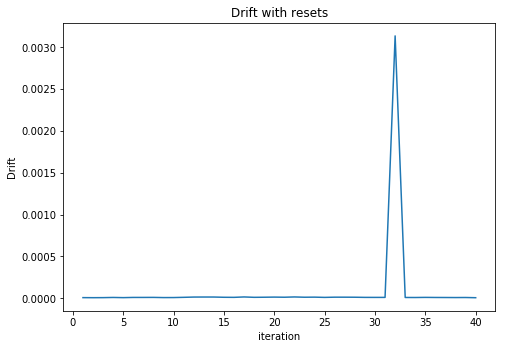

In [3]:
output = driftTrackerCallback.output_summary()
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
axs = fig.add_axes([0,0,1,1])
#loss = lambda act,pred: np.array([custom_loss(act[ii],pred[ii]) for ii in range(act.shape[0])])

axs.plot(np.asarray(output['iterations']),np.asarray(output['drift_dictObj1/dhmul/Dfreq_real:0']))
axs.set_title('Drift with resets')
axs.set_ylabel('Drift')
axs.set_xlabel('iteration')
print(len(output['iterations']))

In [4]:
for ii in output['drift_dictObj1/dhmul/Dfreq_real:0']:
    if ii > 5e-5:
        print(ii)

tf.Tensor(0.0031356812, shape=(), dtype=float32)


In [1]:
import tensorflow as tf
import numpy as np
import matrix_decompositions_tf as fctr
import transforms as transf
import post_process_grad as ppg
import tf_rewrites as tfr

fltrSz = (3,3)
fftSz = (8,8)
noc = 3
nof = 8
rho = 1.0
lraParam = {'n_components': 3}
nots = 100
dtype = tf.complex128

AInv = fctr.dictionary_object2D(fltrSz=fltrSz,fftSz=fftSz,noc = noc,nof = nof,rho = rho,name='dictObj1',lraParam = lraParam,dtype=dtype)
AInv2 = fctr.dictionary_object2D_full(fltrSz=fltrSz,fftSz = fftSz,noc = noc,nof = nof, rho = rho,name='dictObj2',lraParam = lraParam,dtype=dtype)

w = tf.complex(tf.random.normal((nots,) + fftSz + (noc,1),dtype=dtype.real_dtype),tf.random.normal((nots,) + fftSz + (noc,1),dtype = dtype.real_dtype))
w = w + tf.math.conj(tf.reverse(w,axis=(2,3)))
w = w[slice(None),slice(None),slice(0,5,1),slice(None),slice(None)]

B = transf.fft2d_inner(fftSz)(tf.random.normal((1,) + fltrSz + (noc,nof,),dtype=dtype.real_dtype))

x = tf.linalg.matmul(B,w,adjoint_a=True)
xi = tf.keras.layers.Input(x.shape[1:],dtype=dtype)
y = rho*xi + tf.linalg.matmul(B,tf.linalg.matmul(B,xi),adjoint_a=True)
z = AInv.qinv(y)
z2 = AInv2.qinv(y)

my_model = ppg.Model_PostProcess(xi,z)
my_model2 = ppg.Model_PostProcess(xi,z2)

my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
,loss=tf.keras.losses.MSE,run_eagerly=False)
my_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
),loss=tf.keras.losses.MSE,run_eagerly=False)

my_model.fit(x=x,y=x,batch_size=10,epochs=16)
my_model2.fit(x=x,y=x,batch_size=10,epochs=16)

Epoch 1/16
10/10 [==============================] - 0s 4ms/step - loss: 764530.2500
Epoch 2/16
10/10 [==============================] - 0s 5ms/step - loss: 503767.4062
Epoch 3/16
10/10 [==============================] - 0s 4ms/step - loss: 330864.3438
Epoch 4/16
10/10 [==============================] - 0s 4ms/step - loss: 254164.2188
Epoch 5/16
10/10 [==============================] - 0s 5ms/step - loss: 222470.6406
Epoch 6/16
10/10 [==============================] - 0s 4ms/step - loss: 198319.1406
Epoch 7/16
10/10 [==============================] - 0s 4ms/step - loss: 176596.2812
Epoch 8/16
10/10 [==============================] - 0s 4ms/step - loss: 159478.2656
Epoch 9/16
10/10 [==============================] - 0s 4ms/step - loss: 152370.0312
Epoch 10/16
10/10 [==============================] - 0s 5ms/step - loss: 147164.6875
Epoch 11/16
10/10 [==============================] - 0s 4ms/step - loss: 138172.2969
Epoch 12/16
10/10 [==============================] - 0s 5ms/step - loss: 1

In [3]:
print(my_model2.trainable_variables)

[<tf.Variable 'Variable:0' shape=(1, 8, 5, 5, 4) dtype=complex128, numpy=
array([[[[[ 1.41247298e-01+0.j        , -3.44359562e-01+0.j        ,
           -6.91091899e-01+0.j        ,  4.61993742e-01+0.j        ],
          [-2.33630120e-01+0.j        ,  2.37050274e-01+0.j        ,
            3.94162360e-01+0.j        , -2.15036000e-01+0.j        ],
          [ 4.00917950e-03+0.j        , -7.69416331e-01+0.j        ,
           -4.28414750e-01+0.j        , -3.15492786e-01+0.j        ],
          [-3.01241933e-01+0.j        , -1.37314676e+00+0.j        ,
           -1.31123490e+00+0.j        ,  7.59026949e-01+0.j        ],
          [ 3.53637022e-01+0.j        ,  3.72168171e-01+0.j        ,
            6.01549996e-01+0.j        , -1.10003294e-01+0.j        ]],

         [[-6.51684389e-01-0.2201727j ,  6.68118065e-01+0.71814592j,
           -1.32184150e+00-0.14431602j,  6.52643548e-01-0.21231671j],
          [ 1.86830754e+00+2.03011358j,  1.03222962e+00+0.66421177j,
            2.0234156

In [1]:

-

Epoch 1/16
10/10 [==============================] - 0s 2ms/step - loss: 65249.9453
Epoch 2/16
10/10 [==============================] - 0s 2ms/step - loss: 3318.8362
Epoch 3/16
10/10 [==============================] - 0s 2ms/step - loss: 2423.3752
Epoch 4/16
10/10 [==============================] - 0s 2ms/step - loss: 1975.0524
Epoch 5/16
10/10 [==============================] - 0s 2ms/step - loss: 1695.5704
Epoch 6/16
10/10 [==============================] - 0s 2ms/step - loss: 1501.6692
Epoch 7/16
10/10 [==============================] - 0s 2ms/step - loss: 1358.1492
Epoch 8/16
10/10 [==============================] - 0s 2ms/step - loss: 1247.1731
Epoch 9/16
10/10 [==============================] - 0s 2ms/step - loss: 1158.5977
Epoch 10/16
10/10 [==============================] - 0s 2ms/step - loss: 1086.1725
Epoch 11/16
10/10 [==============================] - 0s 2ms/step - loss: 1025.8113
Epoch 12/16
10/10 [==============================] - 0s 2ms/step - loss: 974.7156
Epoch 13/16
1

In [1]:
print(tf.math.reduce_max(tf.abs(AInv.qinv.L - AInv2.qinv.L)))
print(tf.math.reduce_max(tf.abs(AInv.dhmul.Df - AInv2.dhmul.Df)))
print(tf.math.reduce_max(tf.abs(AInv.dhmul.Dfprev - AInv2.dhmul.Dfprev)))
print(tf.math.reduce_max(tf.abs(AInv.D - AInv2.D)))
print(tf.math.reduce_max(tf.abs(AInv.R - AInv2.R)))

NameError: name 'tf' is not defined

In [1]:
import tensorflow as tf
import numpy as np
import matrix_decompositions_tf as fctr
import transforms as transf
import post_process_grad as ppg


fltrSz = (3,3)
fftSz = (8,8)
noc = 3
nof = 8
rho = 1.0
lraParam = {'n_components': 3}
nots = 100
dtype = tf.complex128

D = tf.random.normal(shape=(1,) + fltrSz + (noc,nof,),dtype=dtype.real_dtype)
AInv = fctr.dictionary_object2D_init(fftSz=fftSz,D=D,rho=rho,name='dictObj1',lraParam=lraParam)
AInv2 = fctr.dictionary_object2D_init_full(fftSz=fftSz,D=D,rho=rho,name='dictObj2',lraParam=lraParam)

w = tf.complex(tf.random.normal((nots,) + fftSz + (noc,1),dtype=dtype.real_dtype),tf.random.normal((nots,) + fftSz + (noc,1),dtype = dtype.real_dtype))
w = w + tf.math.conj(tf.reverse(w,axis=(2,3)))
w = w[slice(None),slice(None),slice(0,5,1),slice(None),slice(None)]

B = transf.fft2d_inner(fftSz)(tf.random.normal((1,) + fltrSz + (noc,nof,),dtype=dtype.real_dtype))

x = tf.linalg.matmul(B,w,adjoint_a=True)
xi = tf.keras.layers.Input(x.shape[1:],dtype=dtype)
y = rho*xi + tf.linalg.matmul(B,tf.linalg.matmul(B,xi),adjoint_a=True)
z = AInv.qinv(y)
z2 = AInv2.qinv(y)

my_model = ppg.Model_PostProcess(xi,z)
my_model2 = ppg.Model_PostProcess(xi,z2)

my_model.compile(optimizer=tf.keras.optimizers.SGD(0.001),loss=tf.keras.losses.MSE,run_eagerly=False)
my_model2.compile(optimizer=tf.keras.optimizers.SGD(0.001),loss=tf.keras.losses.MSE,run_eagerly=False)


my_model.fit(x=x,y=x,shuffle=False,batch_size=10,epochs=16)
my_model2.fit(x=x,y=x,shuffle=False,batch_size=10,epochs=16)

Epoch 1/16
10/10 [==============================] - 0s 4ms/step - loss: 188730.3438
Epoch 2/16
10/10 [==============================] - 0s 4ms/step - loss: 49708.1211
Epoch 3/16
10/10 [==============================] - 0s 5ms/step - loss: 33077.8945
Epoch 4/16
10/10 [==============================] - 0s 5ms/step - loss: 22226.5645
Epoch 5/16
10/10 [==============================] - 0s 5ms/step - loss: 17651.6035
Epoch 6/16
10/10 [==============================] - 0s 4ms/step - loss: 14889.5664
Epoch 7/16
10/10 [==============================] - 0s 5ms/step - loss: 13365.1934
Epoch 8/16
10/10 [==============================] - 0s 4ms/step - loss: 12544.6992
Epoch 9/16
10/10 [==============================] - 0s 4ms/step - loss: 12067.2949
Epoch 10/16
10/10 [==============================] - 0s 5ms/step - loss: 11762.1924
Epoch 11/16
10/10 [==============================] - 0s 5ms/step - loss: 11546.3496
Epoch 12/16
10/10 [==============================] - 0s 5ms/step - loss: 11373.5117


In [3]:
print(my_model.trainable_variables)
print(my_model2.trainable_variables)

[<tf.Variable 'Variable:0' shape=(1, 8, 5, 5, 4) dtype=complex128, numpy=
array([[[[[-7.63123504e-15-1.58058976e-16j,
           -4.55954845e-14-2.15808060e-17j,
           -7.28840919e-15-3.30405021e-16j,
            1.42118325e-14-1.41953144e-16j],
          [ 9.47743043e-15+2.93101826e-17j,
            4.97692094e-14-2.19745510e-16j,
            8.57894109e-15+3.62592220e-16j,
           -1.70748647e-14+2.17436203e-16j],
          [ 1.82433376e-14-8.38785166e-16j,
            6.03319054e-14-1.73940534e-15j,
            1.41108705e-14+4.34851336e-16j,
           -2.99154184e-14+6.72564343e-16j],
          [ 1.75056287e-14+1.79481106e-15j,
            1.06653820e-13+1.93061052e-15j,
            1.49967456e-14+1.48190776e-15j,
           -3.17662782e-14-1.49961617e-15j],
          [-1.20411288e-14+4.56526807e-16j,
           -2.41701428e-14+2.30450185e-16j,
           -7.15131469e-15-4.48251135e-16j,
            1.91889642e-14+1.12062784e-16j]],

         [[ 1.84956336e+00-1.01285231e+

In [4]:
print(ppg.PostProcess.update)

{'Variable:0': <bound method dictionary_object2D_init_full._dict_update of <matrix_decompositions_tf.dictionary_object2D_init_full object at 0x7fcd140e8eb8>>}


In [1]:

import tensorflow as tf
import numpy as np
import matrix_decompositions_tf as fctr
import transforms as transf
import post_process_grad as ppg
import tf_rewrites as tfr

fltrSz = (3,3)
fftSz = (8,8)
noc = 5
nof = 4
rho = 1.0
lraParam = {'n_components': 5}
nots = 100
dtype = tf.complex128

AInv = fctr.dictionary_object2D(fltrSz=fltrSz,fftSz=fftSz,noc = noc,nof = nof,rho = rho,name='dictObj1',lraParam = lraParam,dtype=dtype)
AInv2 = fctr.dictionary_object2D_full(fltrSz=fltrSz,fftSz = fftSz,noc = noc,nof = nof, rho = rho,name='dictObj2',lraParam = lraParam,dtype=dtype)

w = tf.complex(tf.random.normal((nots,) + fftSz + (noc,1),dtype=dtype.real_dtype),tf.random.normal((nots,) + fftSz + (noc,1),dtype = dtype.real_dtype))
w = w + tf.math.conj(tf.reverse(w,axis=(2,3)))
w = w[slice(None),slice(None),slice(0,5,1),slice(None),slice(None)]

B = transf.fft2d_inner(fftSz)(tf.random.normal((1,) + fltrSz + (noc,nof,),dtype=dtype.real_dtype))

x = tf.linalg.matmul(B,w,adjoint_a=True)
xi = tf.keras.layers.Input(x.shape[1:],dtype=dtype)
y = rho*xi + tf.linalg.matmul(B,tf.linalg.matmul(B,xi),adjoint_a=True)
z = AInv.qinv(y)
z2 = AInv2.qinv(y)

my_model = ppg.Model_PostProcess(xi,z)
my_model2 = ppg.Model_PostProcess(xi,z2)

my_model.compile(optimizer=tfr.Adam(learning_rate= 0.1),loss=tf.keras.losses.MSE,run_eagerly=False)
my_model2.compile(optimizer=tfr.Adam(learning_rate=0.1),loss=tf.keras.losses.MSE,run_eagerly=False)


my_model.fit(x=x,y=x,batch_size=10,epochs=16)
my_model2.fit(x=x,y=x,batch_size=10,epochs=16)



Epoch 1/16
10/10 [==============================] - 0s 6ms/step - loss: 81098.6172
Epoch 2/16
10/10 [==============================] - 0s 6ms/step - loss: 32230.0859
Epoch 3/16
10/10 [==============================] - 0s 6ms/step - loss: 15936.7148
Epoch 4/16
10/10 [==============================] - 0s 7ms/step - loss: 10131.3447
Epoch 5/16
10/10 [==============================] - 0s 6ms/step - loss: 7330.6362
Epoch 6/16
10/10 [==============================] - 0s 6ms/step - loss: 5473.3237
Epoch 7/16
10/10 [==============================] - 0s 6ms/step - loss: 4167.8408
Epoch 8/16
10/10 [==============================] - 0s 6ms/step - loss: 3508.0493
Epoch 9/16
10/10 [==============================] - 0s 6ms/step - loss: 3114.8484
Epoch 10/16
10/10 [==============================] - 0s 6ms/step - loss: 2802.1799
Epoch 11/16
10/10 [==============================] - 0s 6ms/step - loss: 2616.7607
Epoch 12/16
10/10 [==============================] - 0s 6ms/step - loss: 2499.6118
Epoch 13/

In [1]:
import tensorflow as tf
import numpy as np
import matrix_decompositions_tf as fctr
import transforms as transf
import post_process_grad as ppg
import tf_rewrites as tfr

fltrSz = (3,3)
fftSz = (8,8)
noc = 5
nof = 4
rho = 1.0
lraParam = {'n_components': 5}
nots = 100
dtype = tf.complex128

AInv = fctr.dictionary_object2D(fltrSz=fltrSz,fftSz=fftSz,noc = noc,nof = nof,rho = rho,name='dictObj1',lraParam = lraParam,dtype=dtype)
AInv2 = fctr.dictionary_object2D_full(fltrSz=fltrSz,fftSz = fftSz,noc = noc,nof = nof, rho = rho,name='dictObj2',lraParam = lraParam,dtype=dtype)

w = tf.complex(tf.random.normal((nots,) + fftSz + (noc,1),dtype=dtype.real_dtype),tf.random.normal((nots,) + fftSz + (noc,1),dtype = dtype.real_dtype))
w = w + tf.math.conj(tf.reverse(w,axis=(2,3)))
w = w[slice(None),slice(None),slice(0,5,1),slice(None),slice(None)]

B = transf.fft2d_inner(fftSz)(tf.random.normal((1,) + fltrSz + (noc,nof,),dtype=dtype.real_dtype))

x = tf.linalg.matmul(B,w,adjoint_a=True)
xi = tf.keras.layers.Input(x.shape[1:],dtype=dtype)
y = rho*xi + tf.linalg.matmul(B,tf.linalg.matmul(B,xi),adjoint_a=True)
z = AInv.qinv(y)
z2 = AInv2.qinv(y)

my_model = ppg.Model_PostProcess(xi,z)
my_model2 = ppg.Model_PostProcess(xi,z2)

my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.1),loss=tf.keras.losses.MSE,run_eagerly=False)
my_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss=tf.keras.losses.MSE,run_eagerly=False)


my_model.fit(x=x,y=x,batch_size=10,epochs=16)
my_model2.fit(x=x,y=x,batch_size=10,epochs=16)


Epoch 1/16
10/10 [==============================] - 0s 6ms/step - loss: 124823.5391
Epoch 2/16
10/10 [==============================] - 0s 7ms/step - loss: 48892.5508
Epoch 3/16
10/10 [==============================] - 0s 6ms/step - loss: 22944.1445
Epoch 4/16
10/10 [==============================] - 0s 6ms/step - loss: 14387.8213
Epoch 5/16
10/10 [==============================] - 0s 6ms/step - loss: 11315.1729
Epoch 6/16
10/10 [==============================] - 0s 6ms/step - loss: 9625.2539
Epoch 7/16
10/10 [==============================] - 0s 6ms/step - loss: 8791.3311
Epoch 8/16
10/10 [==============================] - 0s 6ms/step - loss: 8259.8896
Epoch 9/16
10/10 [==============================] - 0s 6ms/step - loss: 7397.1333
Epoch 10/16
10/10 [==============================] - 0s 6ms/step - loss: 6554.7227
Epoch 11/16
10/10 [==============================] - 0s 6ms/step - loss: 5850.7612
Epoch 12/16
10/10 [==============================] - 0s 6ms/step - loss: 5232.1133
Epoch 1